In [155]:
from matplotlib import pyplot as io
import numpy as np
from PIL import Image
from collections import defaultdict

In [3]:
np.random.seed(42)

## Compress Image

In [132]:
class ImageCompressor(object):
    def __init__(self, k_cluster):
        """
        Args:
            img : str
                Path to image
        """
        self.img = None
        self.k_cluster = k_cluster
        self.centroids = np.transpose(np.array([
            np.random.randint(low = 0, high = 255, size = k_cluster),
            np.random.randint(low = 0, high = 255, size = k_cluster)
        ]))
        
    def _compute_dist(self, x, y):
        """
        Compute squared Euclidean distance based on x-y coordinates
        """
        return np.sum(np.square(x - y))
    
    def _assign_pixel(self, xs, ys):
        """
        Assign color cluster to pixel
        """
        # find closet centroid
        dists = []
        for centroid in self.centroids:
            dists.append(np.square(xs - centroid[0]) + np.square(ys - centroid[1]))
        dists = np.array(dists)        
        indices = np.argmin(dists, axis = 0)

        # compute total distance
        total_dist = sum([dists[indices[x,y], x, y] for x in range(len(indices)) for y in range(len(indices[0]))])

        return indices, total_dist
    
    def _update_clusters(self, points):
        """
        Update new clusters
        Args:
            points : collections.defaultdict(list)
        Returns:
            None
        """
        
        for cls in range(self.k_cluster):
            pts = np.array(points[cls])
            self.centroids[cls] = [np.floor(np.mean(pts[:, 0])),
                                   np.floor(np.mean(pts[:, 1]))]
        return None

    def compress_img(self, img, epochs, patience = 5, delta = 0.001):
        """
        Compress image using K-Mean Clustering
        Args:
            img : np.array
                Image
            epochs : integer
                Number of epochs
            patience : integer
                Patience of convergence. If the distance changes under delta for patience, then stop
            delta : float
                Margin of difference
        """
        
        # initialize previous total distance
        prev_total_dist = np.inf
        
        # x-y coordinates
        xs = np.array([[x] * img.shape[1] for x in range(img.shape[0])])
        ys = np.array([list(range(img.shape[1]))] * img.shape[0])

        # train K-Mean
        for iter in range(epochs):
            
            # initialize centroid points
            points = defaultdict(list)

            # find closet clusters
            indices, total_dist = self._assign_pixel(xs, ys)
            
            # assign pixels
            for x in range(img.shape[0]):
                for y in range(img.shape[1]):
                    centroid = self.centroids[indices[x,y]]
                    # assign pixel
                    img[x,y] = img[centroid[0], centroid[1]]
                    # add points to clusters
                    points[indices[x,y]].append([x,y])
            
            # update clusters
            self._update_clusters(points)

            # reset points
            del points
            
            print('Epoch {} - Distance Loss {:2e}'.format(iter, total_dist))
            
            # terminate training
            if prev_total_dist is np.inf or delta < (1 - total_dist/prev_total_dist):
                prev_total_dist = total_dist
                patience = 5 # reset patience
            else:
                if patience == 0:
                    break
                else:
                    patience -= 1        
        return img

In [146]:
# experiment with multipke K-cluster = {2,5,10,15,20}
k_clusters = [2,5,10,15,20]
epochs = 50
patience = 5
delta = 0.001

## Koala

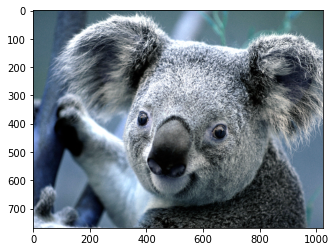

In [156]:
koala = 'koala.jpg'
koala_img = io.imread(koala)
io.imshow(koala_img)

In [167]:
# run K-Mean
koala_results = defaultdict()
for k_c in k_clusters:
    print('Compressing Koala image with K-cluster = {}'.format(k_c))
    compressor = ImageCompressor(k_cluster = k_c)
    koala_results[k_c] = compressor.compress_img(
        img = koala_img.copy(), epochs = epochs,
        patience = patience, delta = delta)

Compressing Koala image with K-cluster = 2
Epoch 0 - Distance Loss 2.077143e+11
Epoch 1 - Distance Loss 6.615131e+10
Epoch 2 - Distance Loss 5.843886e+10
Epoch 3 - Distance Loss 5.645727e+10
Epoch 4 - Distance Loss 5.599218e+10
Epoch 5 - Distance Loss 5.587894e+10
Epoch 6 - Distance Loss 5.584707e+10
Epoch 7 - Distance Loss 5.583956e+10
Epoch 8 - Distance Loss 5.583720e+10
Epoch 9 - Distance Loss 5.583562e+10
Epoch 10 - Distance Loss 5.583562e+10
Epoch 11 - Distance Loss 5.583562e+10
Compressing Koala image with K-cluster = 5
Epoch 0 - Distance Loss 2.059009e+11
Epoch 1 - Distance Loss 4.767585e+10
Epoch 2 - Distance Loss 3.733629e+10
Epoch 3 - Distance Loss 3.275573e+10
Epoch 4 - Distance Loss 3.031607e+10
Epoch 5 - Distance Loss 2.873718e+10
Epoch 6 - Distance Loss 2.733680e+10
Epoch 7 - Distance Loss 2.598866e+10
Epoch 8 - Distance Loss 2.501907e+10
Epoch 9 - Distance Loss 2.441842e+10
Epoch 10 - Distance Loss 2.396267e+10
Epoch 11 - Distance Loss 2.334934e+10
Epoch 12 - Distance Lo

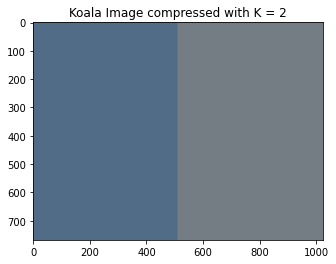

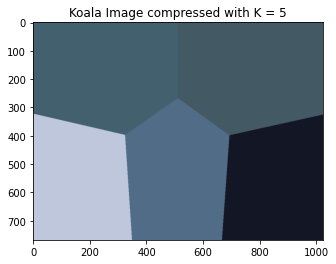

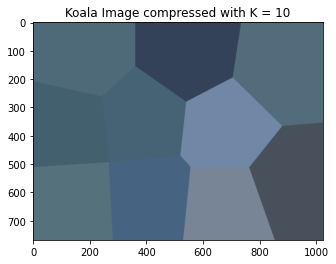

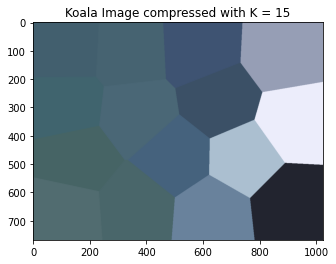

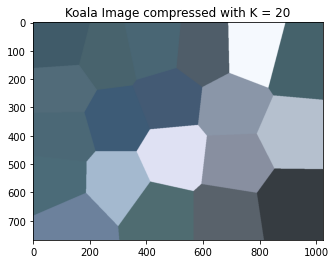

In [168]:
for k_c, res in koala_results.items():
    io.imshow(res)
    io.title('Koala Image compressed with K = {}'.format(k_c))
    io.show()

## Penguin

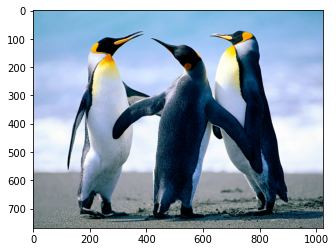

In [169]:
penguin = 'penguins.jpg'
penguin_img = io.imread(penguin)
io.imshow(penguin_img)

In [170]:
# run K-Mean
penguin_results = defaultdict()
for k_c in k_clusters:
    print('Compressing Koala image with K-cluster = {}'.format(k_c))
    compressor = ImageCompressor(k_cluster = k_c)
    penguin_results[k_c] = compressor.compress_img(
        img = penguin_img.copy(), epochs = epochs,
        patience = patience, delta = delta)

Compressing Koala image with K-cluster = 2
Epoch 0 - Distance Loss 2.045511e+11
Epoch 1 - Distance Loss 8.031757e+10
Epoch 2 - Distance Loss 7.805711e+10
Epoch 3 - Distance Loss 7.661786e+10
Epoch 4 - Distance Loss 7.383323e+10
Epoch 5 - Distance Loss 6.565658e+10
Epoch 6 - Distance Loss 5.811141e+10
Epoch 7 - Distance Loss 5.617532e+10
Epoch 8 - Distance Loss 5.588434e+10
Epoch 9 - Distance Loss 5.584272e+10
Epoch 10 - Distance Loss 5.583674e+10
Epoch 11 - Distance Loss 5.583526e+10
Epoch 12 - Distance Loss 5.583484e+10
Epoch 13 - Distance Loss 5.583484e+10
Epoch 14 - Distance Loss 5.583484e+10
Compressing Koala image with K-cluster = 5
Epoch 0 - Distance Loss 1.969593e+11
Epoch 1 - Distance Loss 7.037555e+10
Epoch 2 - Distance Loss 4.326425e+10
Epoch 3 - Distance Loss 3.122288e+10
Epoch 4 - Distance Loss 2.703593e+10
Epoch 5 - Distance Loss 2.521637e+10
Epoch 6 - Distance Loss 2.437289e+10
Epoch 7 - Distance Loss 2.393715e+10
Epoch 8 - Distance Loss 2.367896e+10
Epoch 9 - Distance Lo

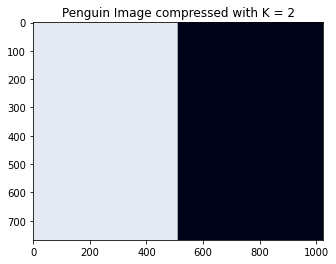

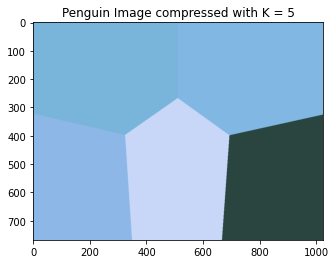

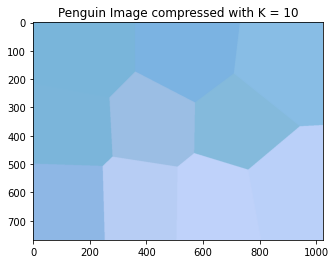

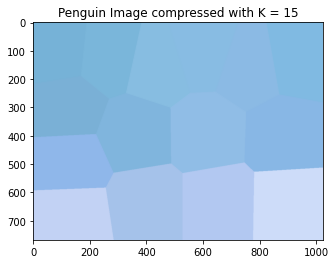

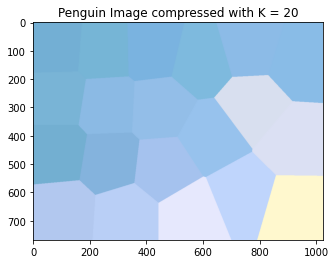

In [171]:
for k_c, res in penguin_results.items():
    io.imshow(res)
    io.title('Penguin Image compressed with K = {}'.format(k_c))
    io.show()

## Discussion

**Design procedures**:
* Centroids are initialized randomly. In other words, the centroids are located randomly in the original image.
* When assigning points to centroids, points closet each centroid is assigned to the centroid's color.
* When updating clusters, the new centroids are assigned to the mean locations of corresponding points.

**Look at the above compressed image, it is obvious that**:
* The higher the K-cluster is, the better the image quality is
* Also, look at the last plot, the yellow region locates at the unexpected location. This is because the centroids are initialized randomly. Hence, the random center initialization matters.
* A good value of K is not among the proposed K values. The good K value should be higher than 20 because an images has 255^3 possible colors. 